# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju e Gabriel Lima Nunes
### **Matrícula** 2021032110 e 2021032048


### **Tema:** Precificação do Seguro de Saúde nos Estados Unidos
### **Base de dados:** https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv


**Todas as células que não possuem comentários que indiquem ter sido criadas manualmente ou alteradas, foram geradas através de iterações com o ChatGPT, com mudanças muito pequenas como nomes de variáveis.**

## **ChatGPT Links**

**Business Understanding** 

**Data Understanding:** 

**Data Preparation:** https://chat.openai.com/share/c1cf2fb1-b305-4780-a653-57d9fc22fafa

**Modeling:** 

**Evaluation:** 


In [1]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


# **Introdução**

# **Motivação**

# **Objetivo**

## **Geral**


## **Específicos**

# **Metodologia**

# **Desenvolvimento**


## **2. Data understanding (Entendimento dos dados)**


#### Carregar CSV

In [2]:
#Carregando a base de dados
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
#df= pd.read_csv("/home/grad/ccomp/21/nuneslima/Downloads/insurance.csv")

#### Explorar o Dataframe


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display basic statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


As colunas presentes são
- age: Idade do beneficiário primário;

- sex: Gênero do contratante, masculino ou feminino;

- bmi: Indíce de Massa Corporal, idealmente entre 18.5 e 24.9;

- children: Número de crianças cobertas pelo seguro de saúde/ Número de dependentes;

- smoker: Se o beneficiário é fumante;

- region: Em que região dos Estados Unidos o beneficiário vive;

- charges: Custos médicos individuais pelo seguro de saúde;

#### Histogramas para cada coluna numérica

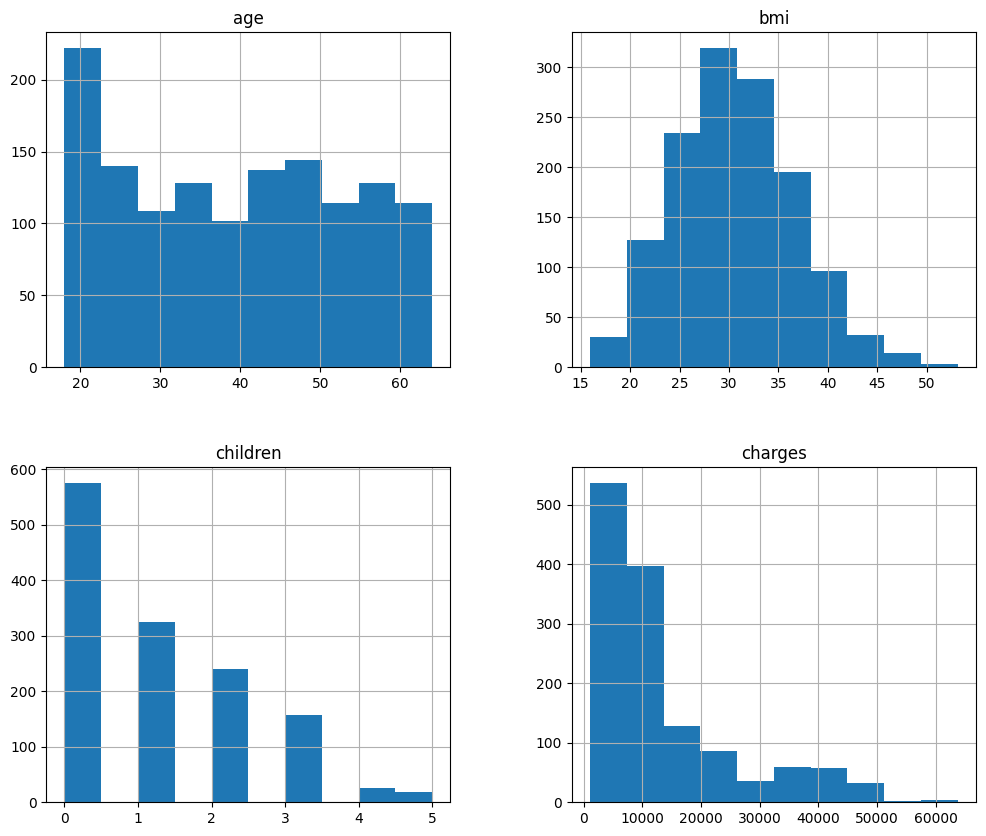

In [5]:
# Plot histograms for numerical columns
df.hist(figsize=(12, 10))
plt.show()

#### Distribuição de Colunas Binárias

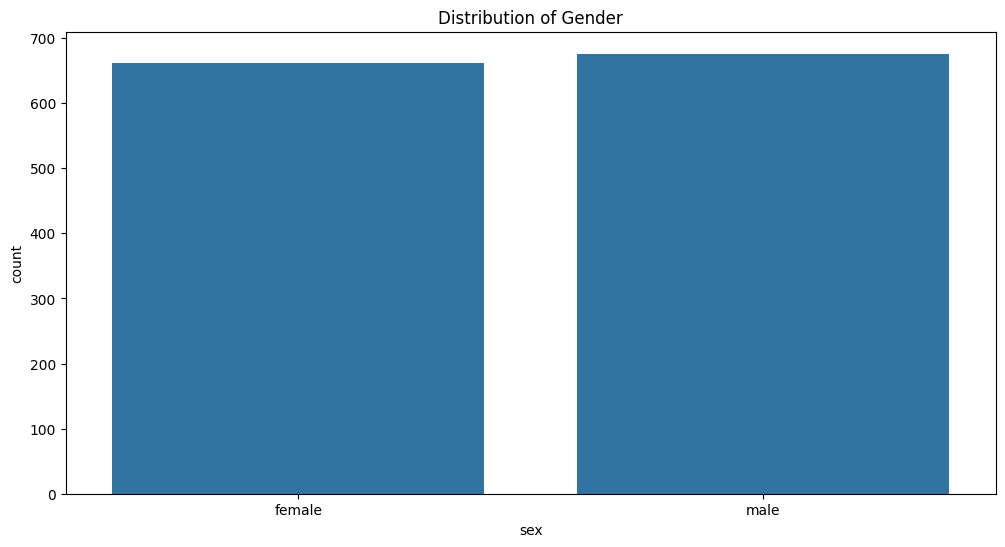

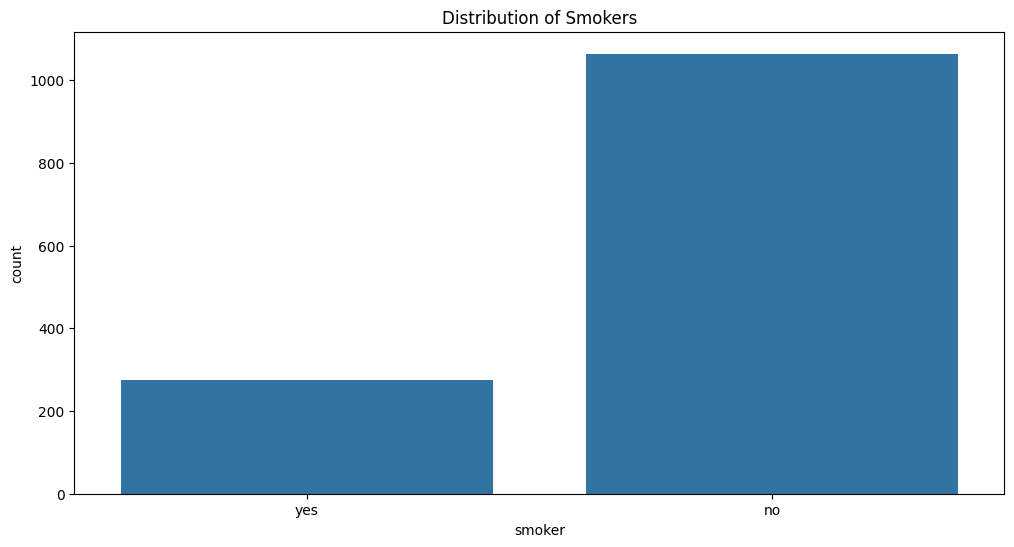

In [6]:
# Countplot for 'sex' and 'smoker'
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='smoker', data=df)
plt.title('Distribution of Smokers')
plt.show()


#### Relação entre atributos

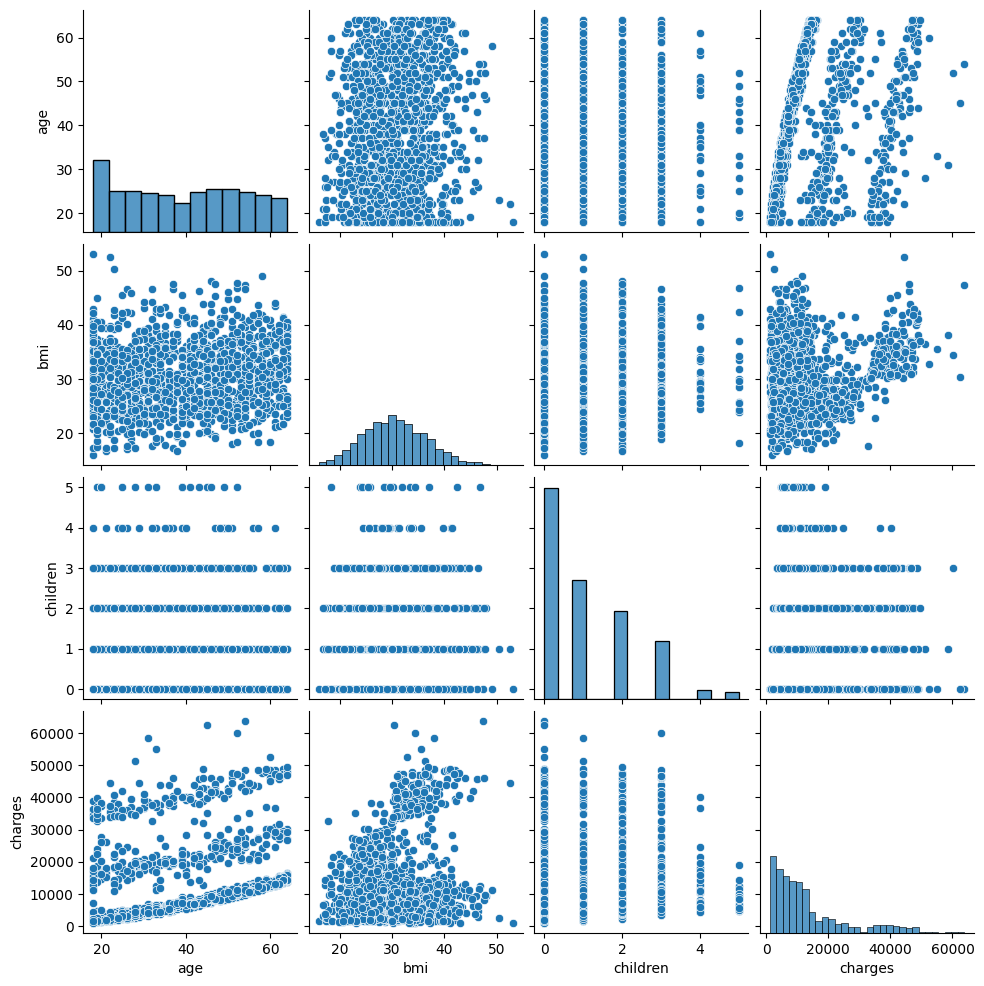

In [7]:
sns.pairplot(df)
plt.show()

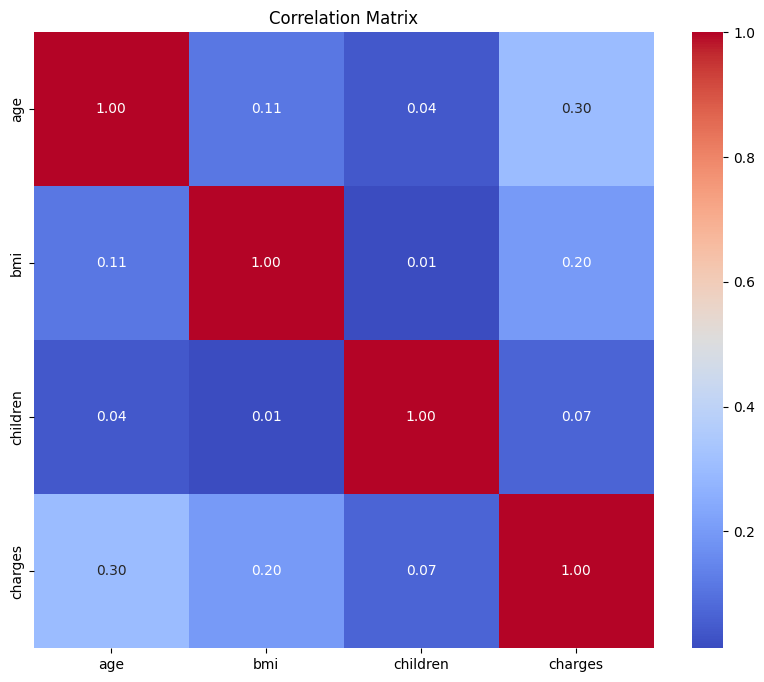

In [8]:
# Correlation matrix heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['sex', 'smoker', 'region']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Boxplots para atributos numéricos

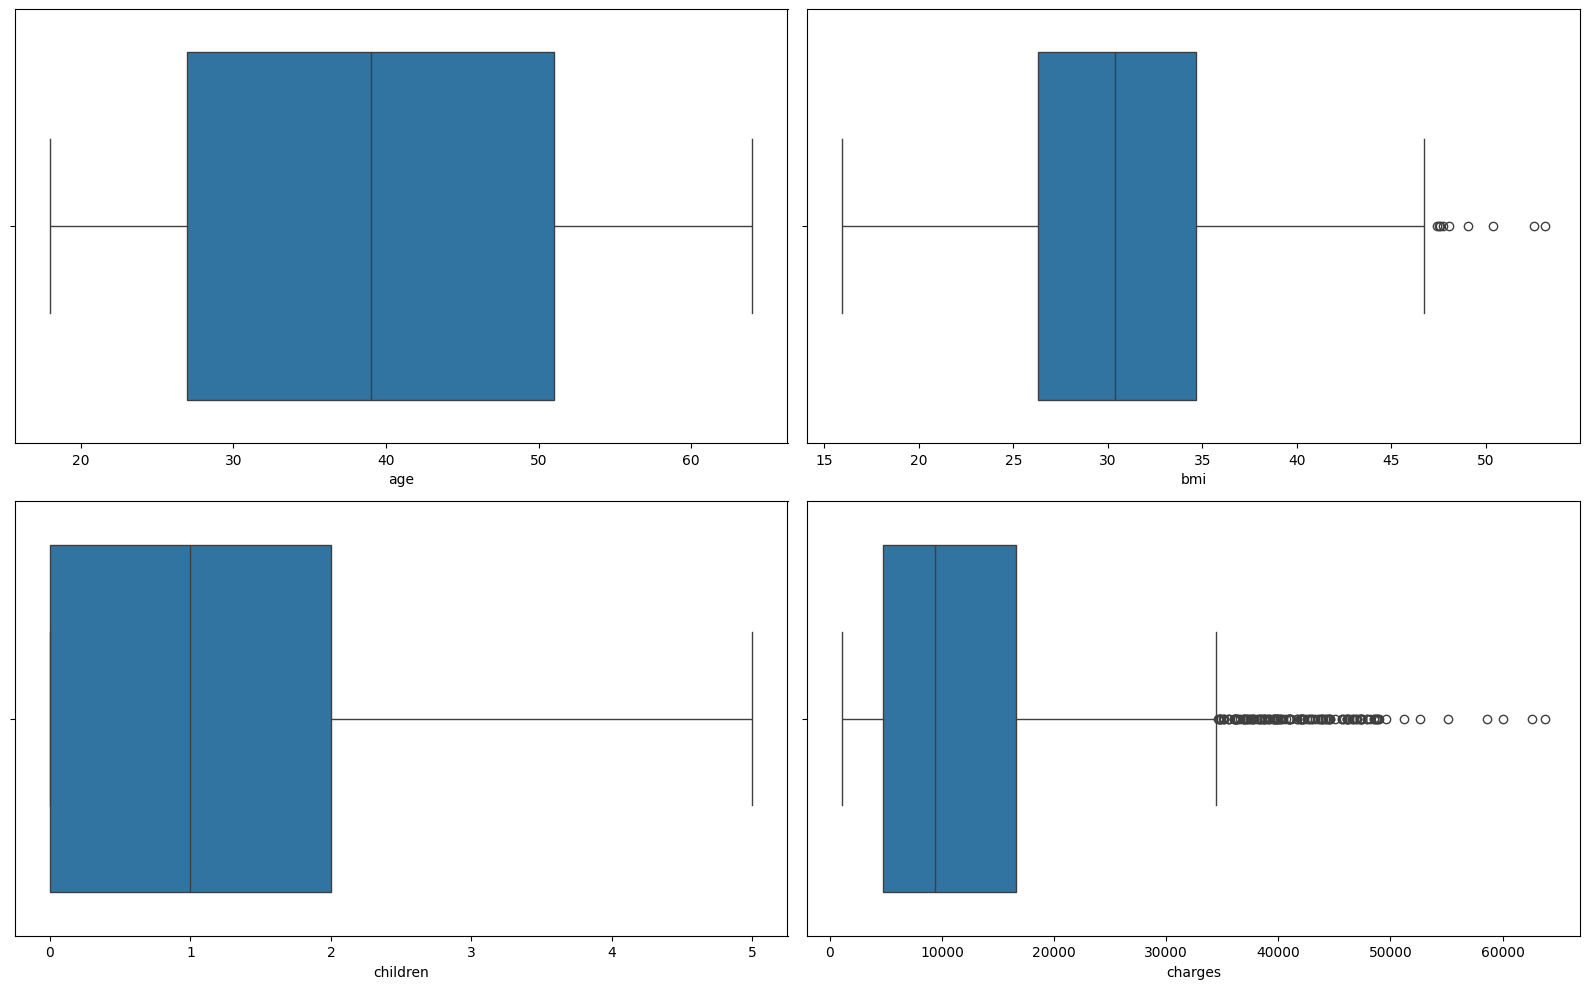

In [9]:
# Create box plots for numerical columns with potential outliers
plt.figure(figsize=(16, 10))

# Box plot for 'age'
plt.subplot(2, 2, 1)
sns.boxplot(x='age', data=df)

# Box plot for 'bmi'
plt.subplot(2, 2, 2)
sns.boxplot(x='bmi', data=df)

# Box plot for 'children'
plt.subplot(2, 2, 3)
sns.boxplot(x='children', data=df)

# Box plot for 'charges'
plt.subplot(2, 2, 4)
sns.boxplot(x='charges', data=df)

plt.tight_layout()
plt.show()


#### Adição de coluna com a categoria do BMI

In [10]:
df=df

In [11]:
# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Healthy Weight'
    elif 25.0 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create a new 'bmi_category' column
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

In [12]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


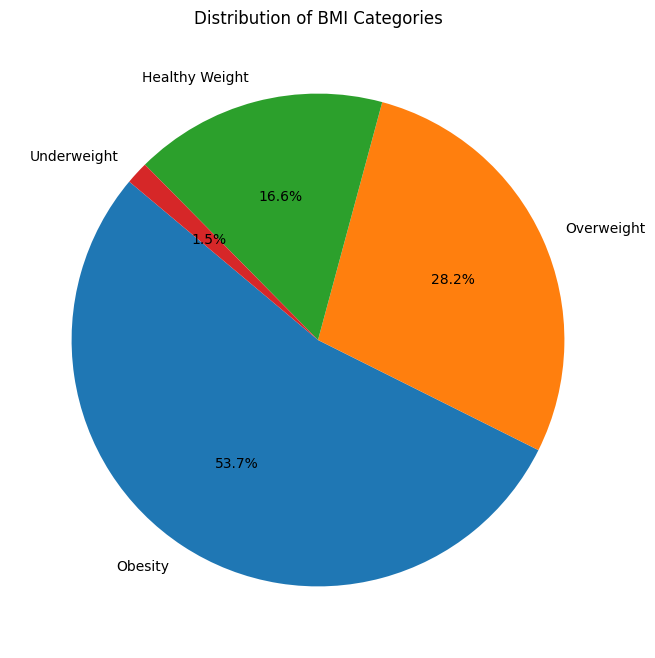

In [13]:
plt.figure(figsize=(8, 8))
explode = (0, 0, 0, 0)  # Explode the first slice (Underweight) for emphasis

# Count the occurrences of each BMI category
bmi_category_counts = df['bmi_category'].value_counts()

# Plot the pie chart
plt.pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of BMI Categories')
plt.show()


#### Relação entre diferentes atributos e o Custo do Seguro

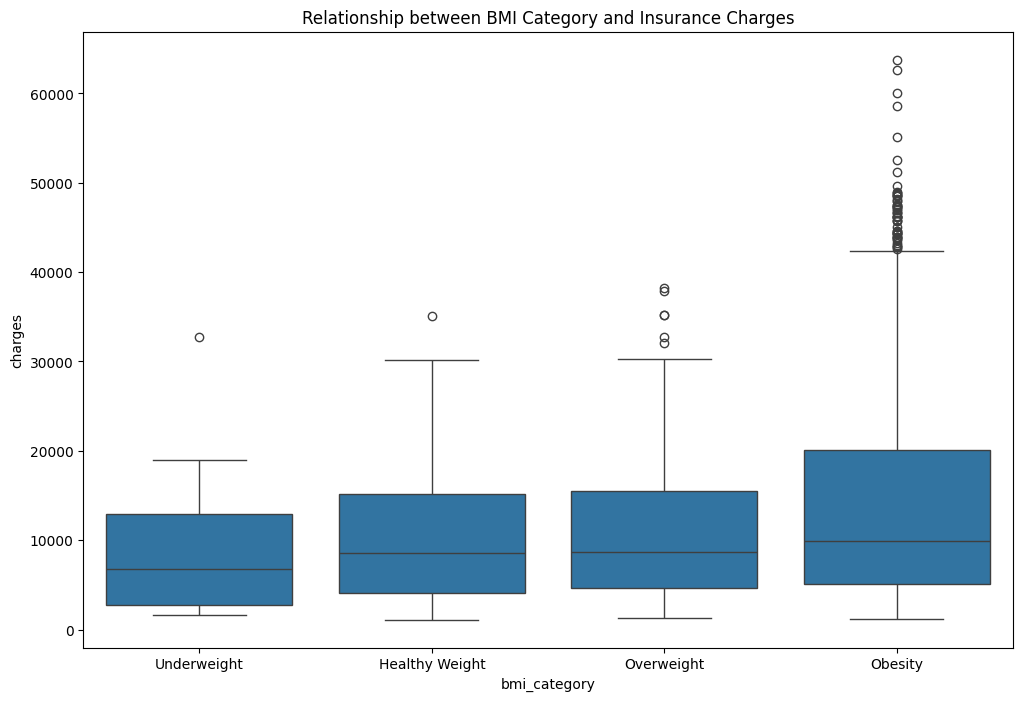

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bmi_category', y='charges', data=df, order=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])
plt.title('Relationship between BMI Category and Insurance Charges')
plt.show()

Percebe-se uma sutil correlação entre o índice de massa corporal e o custo do seguro de saúde. 

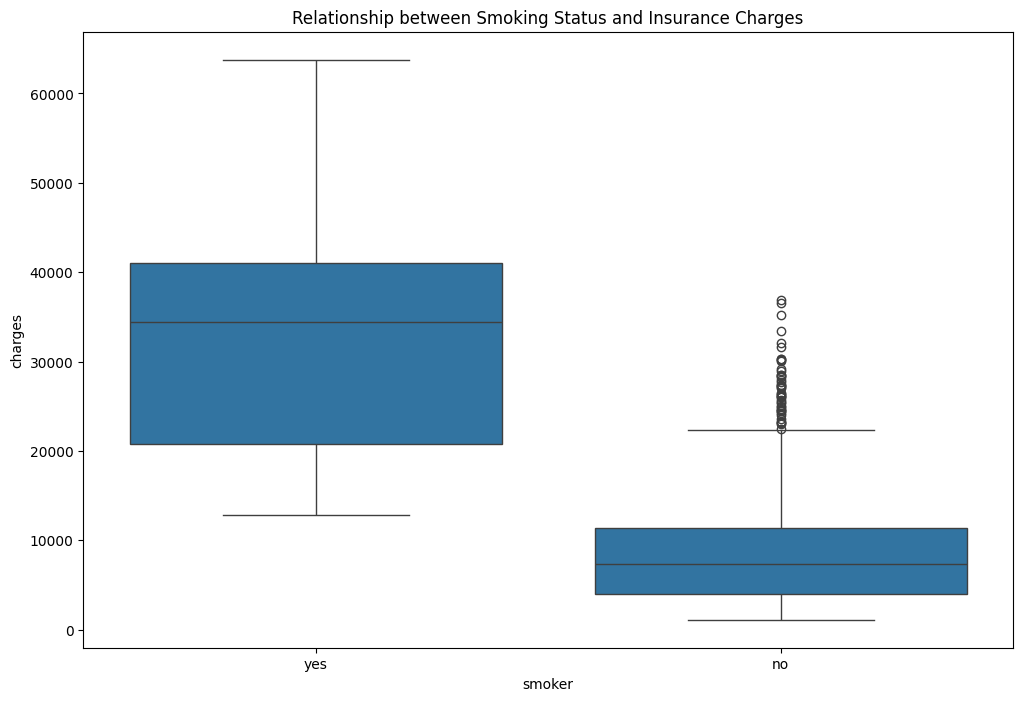

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Relationship between Smoking Status and Insurance Charges')
plt.show()


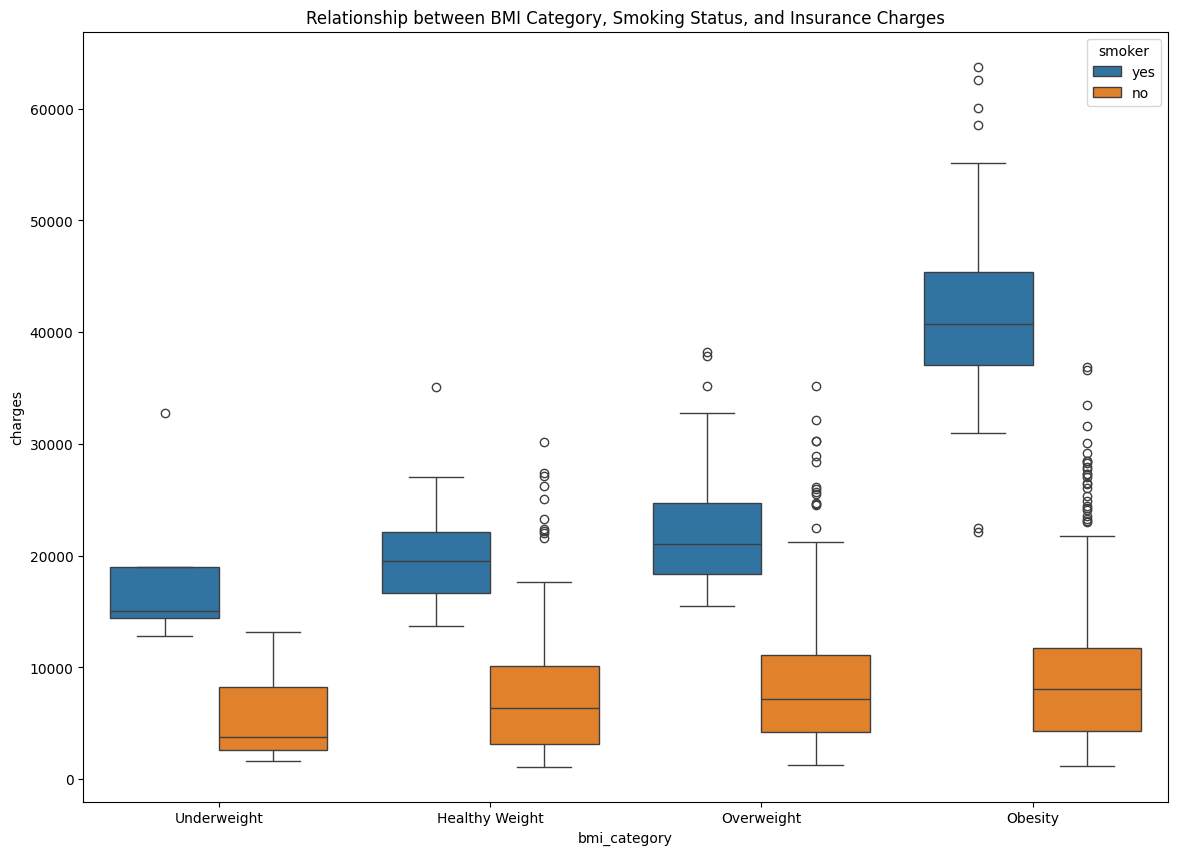

In [16]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='bmi_category', y='charges', hue='smoker', data=df, order=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])
plt.title('Relationship between BMI Category, Smoking Status, and Insurance Charges')
plt.show()


Há uma relação clara entre o fato da pessoa ser fumante e o aumento do preço do seguro de saúde. Em especial, essa relação parece se acentuar conforme o índice de massa corporal aumenta.

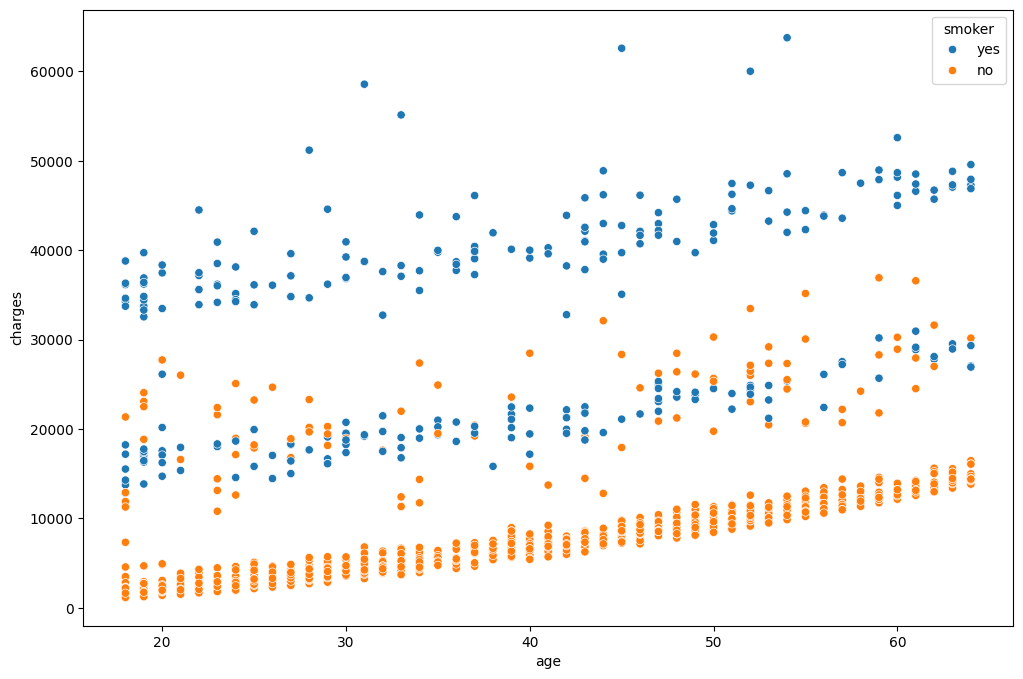

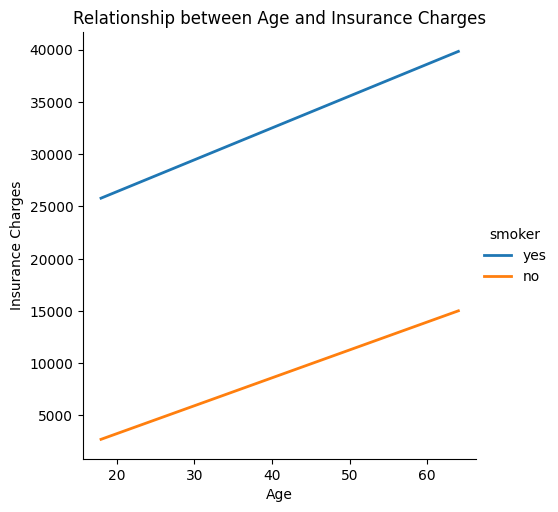

In [50]:
plt.figure(figsize=(12, 8))

# Scatter plot with hue='smoker'
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')

# Plot regression lines for smokers and non-smokers
sns.lmplot(x='age', y='charges', data=df, hue='smoker', ci=None, scatter=False, line_kws={'lw': 2})

plt.title('Relationship between Age and Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()


Avaliarmos o grupo de fumantes e não fumantes separadamente, descosiderando as flutuações,  parece haver uma relação linear entre a idade e o preço do seguro.

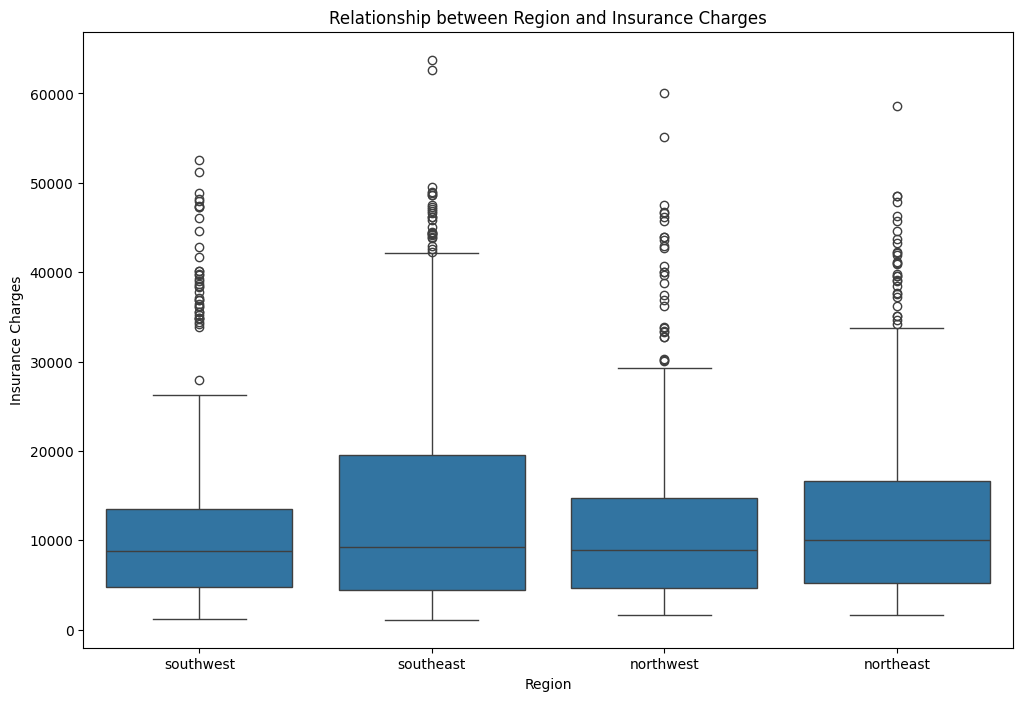

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Relationship between Region and Insurance Charges')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.show()


In [55]:
# Group by 'region' and calculate median, mean, and standard deviation
charges_stats = df.groupby('region')['charges'].agg(['median', 'mean', 'std']).reset_index()
charges_stats


,region,median,mean,std
0,northeast,10057.652025,13406.384516,11255.803066
1,northwest,8965.795750,12417.575374,11072.276928
2,southeast,9294.131950,14735.411438,13971.098589
3,southwest,8798.593000,12346.937377,11557.179101


Não parece haver uma diferença muito grande entre os preços de seguros de saúde entre as regiões.

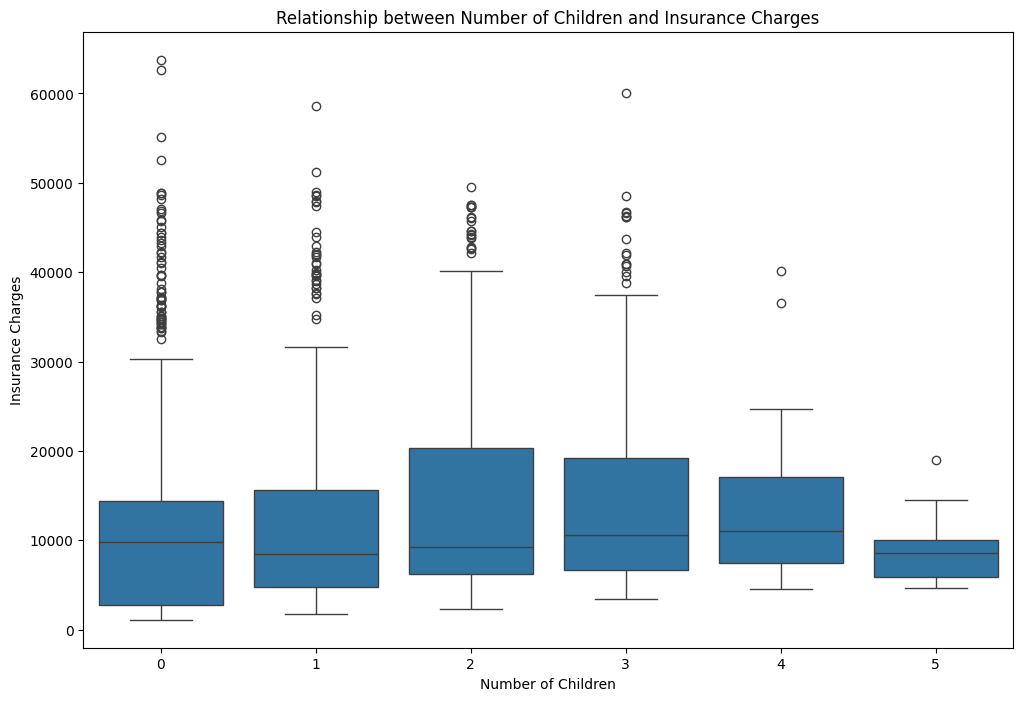

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Relationship between Number of Children and Insurance Charges')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.show()


In [58]:
# Group by 'region' and calculate median, mean, and standard deviation of the number of children
children_stats = df.groupby('children')['charges'].agg(['median', 'mean', 'std']).reset_index()

# Display the resulting DataFrame
children_stats


,children,median,mean,std
0,0,9856.95190,12365.975602,12023.293942
1,1,8483.87015,12731.171832,11823.631451
2,2,9264.97915,15073.563734,12891.368347
3,3,10600.54830,15355.318367,12330.869484
4,4,11033.66170,13850.656311,9139.223321
5,5,8589.56505,8786.035247,3808.435525


Também não parece haver uma relação muito clara entre número de crianças e o preço do seguro.

#### Categorização da Idade

In [18]:
# Function to categorize age into groups
def categorize_age(age):
    if age < 21:
        return 'Children'
    elif 21 <= age < 60:
        return 'Adults'
    else:
        return 'Seniors'

# Apply the function to create a new 'age_group' column
df['age_group'] = df['age'].apply(categorize_age)


#### Relação Idade e Custos do Seguro


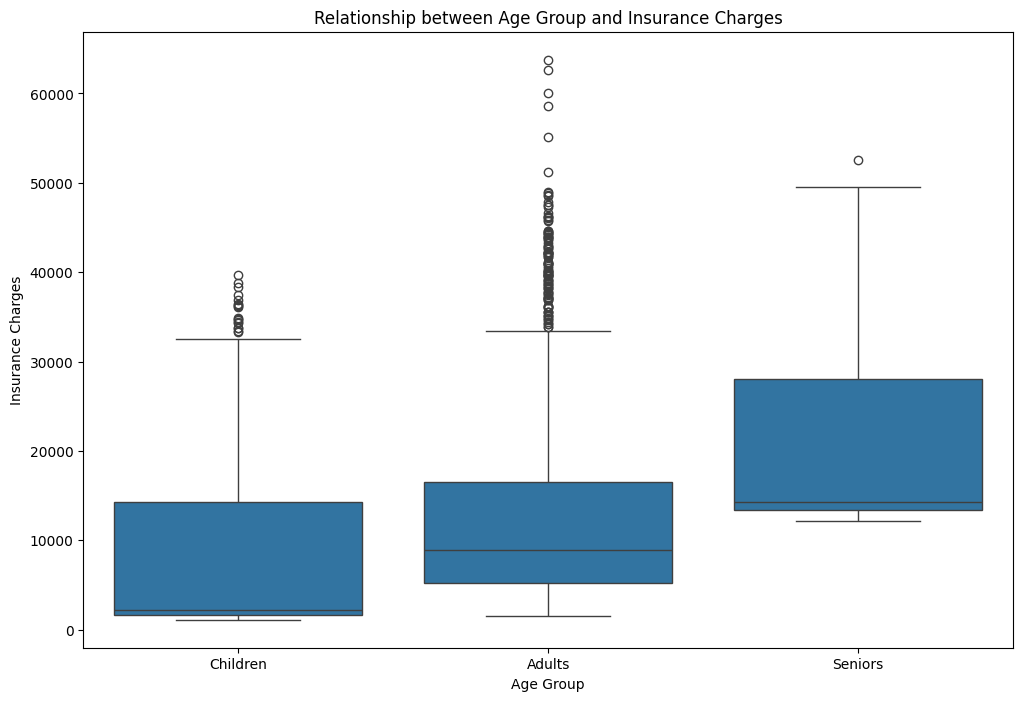

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', data=df, order=['Children', 'Adults', 'Seniors'])
plt.title('Relationship between Age Group and Insurance Charges')
plt.xlabel('Age Group')
plt.ylabel('Insurance Charges')
plt.show()

<Figure size 1400x1000 with 0 Axes>

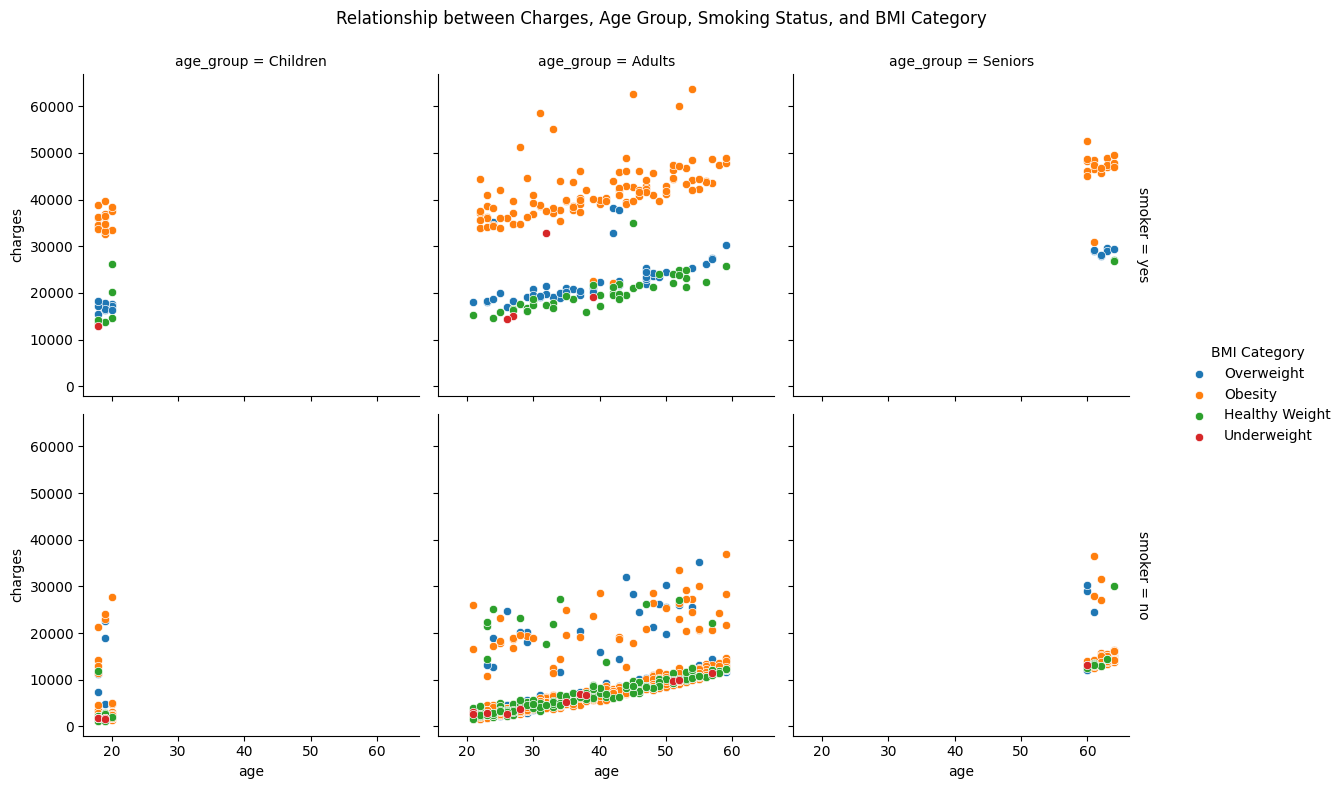

In [20]:
plt.figure(figsize=(14, 10))
g = sns.FacetGrid(df, col='age_group', row='smoker', hue='bmi_category', margin_titles=True, height=4)
g.map(sns.scatterplot, 'age', 'charges')
g.add_legend(title='BMI Category')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Charges, Age Group, Smoking Status, and BMI Category')
plt.show()


<Figure size 1600x1000 with 0 Axes>

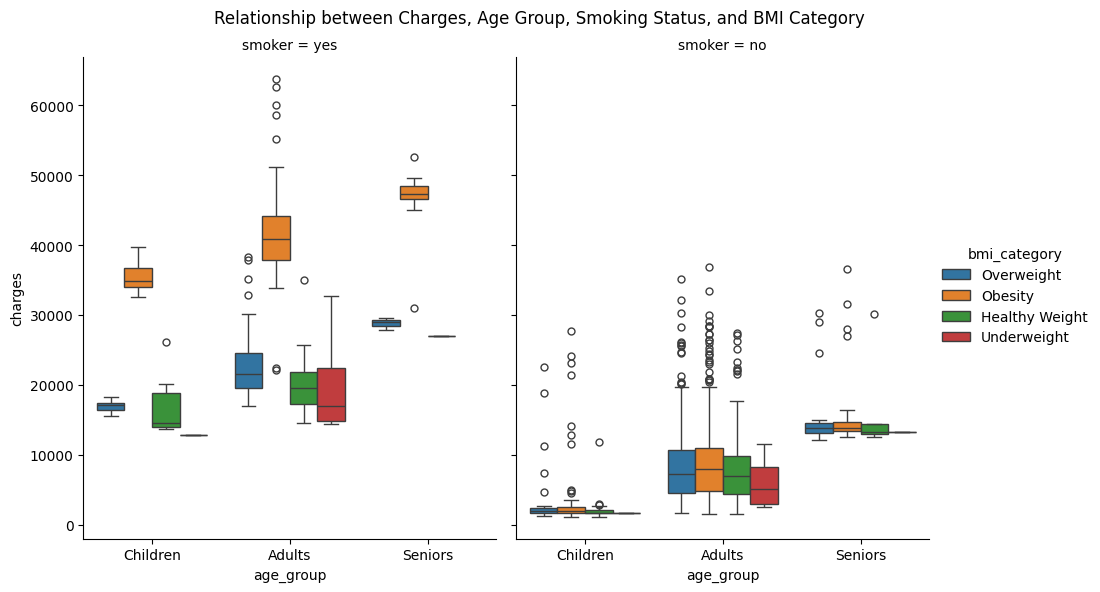

In [21]:
plt.figure(figsize=(16, 10))
sns.catplot(x='age_group', y='charges', hue='bmi_category', col='smoker', data=df, kind='box', height=6, aspect=0.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between Charges, Age Group, Smoking Status, and BMI Category')
plt.show()


Por meio dos gráficos, observa-se uma tendência de que pessoas obesas e fumantes pagam mais cara no seguro. Por outro lado, pessoas com peso saudável e não fumantes costumam pagar mais barato. Além disso, ao avaliar esses dois grupos individualmente, parece haver uma relação linear entre a idade e a preço do seguro.

## **3. Data preparation (Preparação dos dados)**

#### Remoção de linhas com valores nulos 

In [22]:
df.dropna(inplace=True)
print(df.isnull().sum())

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
bmi_category    0
age_group       0
dtype: int64


#### One-Hot Encoding para region, smoker e sex

In [23]:
# Codificação One-Hot para 'region' e 'smoker'
df_prepared = pd.get_dummies(df, columns=['region', 'smoker', 'sex'], drop_first=True)
df_prepared.head()


,age,bmi,children,charges,bmi_category,age_group,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
0,19,27.900,0,16884.92400,Overweight,Children,False,False,True,True,False
1,18,33.770,1,1725.55230,Obesity,Children,False,True,False,False,True
2,28,33.000,3,4449.46200,Obesity,Adults,False,True,False,False,True
3,33,22.705,0,21984.47061,Healthy Weight,Adults,True,False,False,False,True
4,32,28.880,0,3866.85520,Overweight,Adults,True,False,False,False,True


#### Normalização/Padronização

In [24]:
# Escala Min-Max para 'children'
scaler_minmax = MinMaxScaler()
df_prepared['children'] = scaler_minmax.fit_transform(df_prepared[['children']])

# Padronização para 'age' e 'bmi'
scaler_standard = StandardScaler()
df_prepared[['age', 'bmi']] = scaler_standard.fit_transform(df_prepared[['age', 'bmi']])

# Verificação final
df_prepared.describe()

,age,bmi,children,charges
count,1.338000e+03,1.338000e+03,1338.000000,1338.000000
mean,-1.805565e-16,-2.124194e-16,0.218984,13270.422265
std,1.000374e+00,1.000374e+00,0.241099,12110.011237
min,-1.509965e+00,-2.412011e+00,0.000000,1121.873900
25%,-8.691547e-01,-7.164063e-01,0.000000,4740.287150
50%,-1.474046e-02,-4.320880e-02,0.200000,9382.033000
75%,8.396738e-01,6.611572e-01,0.400000,16639.912515
max,1.765289e+00,3.685522e+00,1.000000,63770.428010


#### Seleção de atributos relevantes

In [25]:
df_prepared=df_prepared[['age', 'sex_male', 'bmi', 'children', 'charges','region_northwest', 'region_southeast', 'region_southwest','smoker_yes']]
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex_male          1338 non-null   bool   
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   float64
 4   charges           1338 non-null   float64
 5   region_northwest  1338 non-null   bool   
 6   region_southeast  1338 non-null   bool   
 7   region_southwest  1338 non-null   bool   
 8   smoker_yes        1338 non-null   bool   
dtypes: bool(5), float64(4)
memory usage: 48.5 KB


#### Divisão Teste, Treino e Validação


In [26]:
X = df_prepared[['age', 'sex_male', 'bmi', 'children', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_yes']]
y = df_prepared['charges']

# Divisão inicial em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divisão do conjunto de treinamento em treinamento (60%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verificação do tamanho dos conjuntos
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de validação:", len(X_val))
print("Tamanho do conjunto de teste:", len(X_test))


Tamanho do conjunto de treinamento: 802
Tamanho do conjunto de validação: 268
Tamanho do conjunto de teste: 268


## **4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [27]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'MLPRegressor': MLPRegressor(random_state=42, max_iter=1000),
    'RidgeRegressor': Ridge(alpha=1.0),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    'SupportVectorRegressor': SVR(kernel='linear', C=1.0, epsilon=0.2), 
    'GradientBoostingRegressor': GradientBoostingRegressor(max_depth=3 ,random_state=42)
}

In [28]:
class EvalModel:
    def __init__(self, model_name, model,X, y, X_train, X_val, y_train, y_val):
        self.model_name = model_name
        self.model = model
        self.X = X
        self.y = y
        self.X_train = X_train
        self.X_val = X_val
        self.y_train = y_train
        self.y_val = y_val
    def fit(self):
        self.model.fit(self.X_train, self.y_train)
        
    
    def evaluate_validation(self):
        self.y_pred = self.model.predict(self.X_val)
        self.mae_validation = mean_absolute_error(self.y_val, self.y_pred)
        self.mse_validation = mean_squared_error(self.y_val, self.y_pred)
        self.rmse_validation = np.sqrt(self.mse_validation)
        self.r2_validation = r2_score(self.y_val, self.y_pred)
        
    def evaluate_test(self):
        self.y_pred_test = self.model.predict(X_test)
        self.mae_test = mean_absolute_error(y_test, self.y_pred_test)
        self.mse_test = mean_squared_error(y_test, self.y_pred_test)
        self.rmse_test = np.sqrt(self.mse_test)
        self.r2_test = r2_score(y_test, self.y_pred_test)
        
    def print_evaluation(self):
        print(f"MODEL: {self.model_name}")
        print("Validation:")
        print(f"MAE (validation): {self.mae_validation}")
        print(f"MSE (validation): {self.mse_validation}")
        print(f"RMSE (validation): {self.rmse_validation}")
        print(f"R2 (validation): {self.r2_validation}")
        print("Test:")
        print(f"MAE (test): {self.mae_test}")
        print(f"MSE (test): {self.mse_test}")
        print(f"RMSE (test): {self.rmse_test}")
        print(f"R2 (test): {self.r2_test}")
    def print_kfolds(self):
        k_folds = 5  # You can adjust this based on your preference
        # Create a k-fold cross-validation object
        kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

        # Perform cross-validation and get scores
        neg_mse_scores = cross_val_score(self.model, self.X, self.y, cv=kf, scoring='neg_mean_squared_error')

        # Convert the negative mean squared error to positive (if needed)
        mse_scores = -neg_mse_scores
        
        rsquares = cross_val_score(self.model, self.X, self.y, cv=kf, scoring='r2')
        
        print(f"MODEL: {self.model_name}")
        print("KFolds: ")
        print(f"MSE: {mse_scores.mean()} +- {np.std(mse_scores)}")
        print(f"R2: {rsquares.mean()} +- {np.std(rsquares)}")
    


In [29]:
evaluators = {
    model_name: EvalModel(model_name, model,X, y, X_train, X_val, y_train, y_val) for model_name, model in models.items()
}
    

In [30]:
for __, evaluator  in evaluators.items():
    evaluator.fit()
    

/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## **5. Evaluation (Validação)**


In [31]:
for __, evaluator  in evaluators.items():
    evaluator.evaluate_validation()
    evaluator.evaluate_test()
    

In [32]:
evaluators['LinearRegression'].print_evaluation()
evaluators['LinearRegression'].print_kfolds()

MODEL: LinearRegression
Validation:
MAE (validation): 4574.566188965426
MSE (validation): 45790675.23525156
RMSE (validation): 6766.880761122628
R2 (validation): 0.7282907846159228
Test:
MAE (test): 4166.858722573393
MSE (test): 33753730.19041824
RMSE (test): 5809.79605411569
R2 (test): 0.7825828922009141
MODEL: LinearRegression
KFolds: 
MSE: 36998683.9154736 +- 3128575.4360201196
R2: 0.7401956629640443 +- 0.05777785559236651


In [33]:
evaluators['RandomForestRegressor'].print_evaluation()
evaluators['RandomForestRegressor'].print_kfolds()

MODEL: RandomForestRegressor
Validation:
MAE (validation): 2928.9609588957715
MSE (validation): 30776776.580956925
RMSE (validation): 5547.682090833696
R2 (validation): 0.8173791110547944
Test:
MAE (test): 2485.902119740298
MSE (test): 21078069.24267106
RMSE (test): 4591.085845709167
R2 (test): 0.864230328711008
MODEL: RandomForestRegressor
KFolds: 
MSE: 24084177.39816173 +- 2093316.2748135496
R2: 0.8308371132578678 +- 0.030831350243982706


In [34]:
evaluators['MLPRegressor'].print_evaluation()
evaluators['MLPRegressor'].print_kfolds()

MODEL: MLPRegressor
Validation:
MAE (validation): 8742.667114666205
MSE (validation): 196237040.809392
RMSE (validation): 14008.463185138904
R2 (validation): -0.164416382018441
Test:
MAE (test): 7992.699373893411
MSE (test): 168793172.77164704
RMSE (test): 12992.042671252548
R2 (test): -0.08724349081455296


/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
 

MODEL: MLPRegressor
KFolds: 
MSE: 120870723.61422841 +- 10481872.09506893
R2: 0.16891526746640154 +- 0.04645072446588904


/home/araju/anaconda3/envs/TP_4_MD/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
evaluators['RidgeRegressor'].print_evaluation()
evaluators['RidgeRegressor'].print_kfolds()

MODEL: RidgeRegressor
Validation:
MAE (validation): 4590.267590037545
MSE (validation): 45893195.23449256
RMSE (validation): 6774.451655631809
R2 (validation): 0.7276824592655793
Test:
MAE (test): 4182.30610463215
MSE (test): 33846731.033842295
RMSE (test): 5817.794344409425
R2 (test): 0.7819838480571688
MODEL: RidgeRegressor
KFolds: 
MSE: 36999658.26601936 +- 3069272.364884347
R2: 0.7402671958158755 +- 0.057139430330179666


In [36]:
evaluators['KNeighborsRegressor'].print_evaluation()
evaluators['KNeighborsRegressor'].print_kfolds()

MODEL: KNeighborsRegressor
Validation:
MAE (validation): 4043.005551597015
MSE (validation): 49692948.323411755
RMSE (validation): 7049.322543579046
R2 (validation): 0.7051357742660829
Test:
MAE (test): 3644.3520695485076
MSE (test): 41440256.20856906
RMSE (test): 6437.410675773999
R2 (test): 0.7330718530813571
MODEL: KNeighborsRegressor
KFolds: 
MSE: 34277626.35024081 +- 3861057.89013276
R2: 0.7635283153392246 +- 0.02822387603395776


In [37]:
evaluators['SupportVectorRegressor'].print_evaluation()
evaluators['SupportVectorRegressor'].print_kfolds()

MODEL: SupportVectorRegressor
Validation:
MAE (validation): 8801.157925823685
MSE (validation): 189622827.62004176
RMSE (validation): 13770.360475312247
R2 (validation): -0.12516946838747822
Test:
MAE (test): 8342.137510547847
MSE (test): 164994243.30543625
RMSE (test): 12845.008497678631
R2 (test): -0.06277353586093026


MODEL: SupportVectorRegressor
KFolds: 
MSE: 158844724.28213578 +- 19881524.340300515
R2: -0.0857936171165464 +- 0.0263407813128644


In [38]:
evaluators['GradientBoostingRegressor'].print_evaluation()
evaluators['GradientBoostingRegressor'].print_kfolds()

MODEL: GradientBoostingRegressor
Validation:
MAE (validation): 2881.61307105519
MSE (validation): 28957087.89132442
RMSE (validation): 5381.179042860814
R2 (validation): 0.8281766409790245
Test:
MAE (test): 2404.2364920847613
MSE (test): 19347524.326216206
RMSE (test): 4398.5820813321425
R2 (test): 0.8753772469487687


MODEL: GradientBoostingRegressor
KFolds: 
MSE: 20994831.518405277 +- 2928964.2142662215
R2: 0.8527384178257993 +- 0.03456905796527283


Dessa forma, observa-se que o modelo com o Gradient Booster teve o melhor desempenho

### Importância das features

In [39]:
importances = models['GradientBoostingRegressor'].feature_importances_

# Create a DataFrame to associate importances with feature names
feature_importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
# Sort features by importance in descending order
feature_importance_gb = feature_importance_gb.sort_values(by='Importance', ascending=False)
feature_importance_gb

,Feature,Importance
7,smoker_yes,0.663965
2,bmi,0.196802
0,age,0.124147
3,children,0.010725
4,region_northwest,0.001521
1,sex_male,0.001203
6,region_southwest,0.001046
5,region_southeast,0.000592


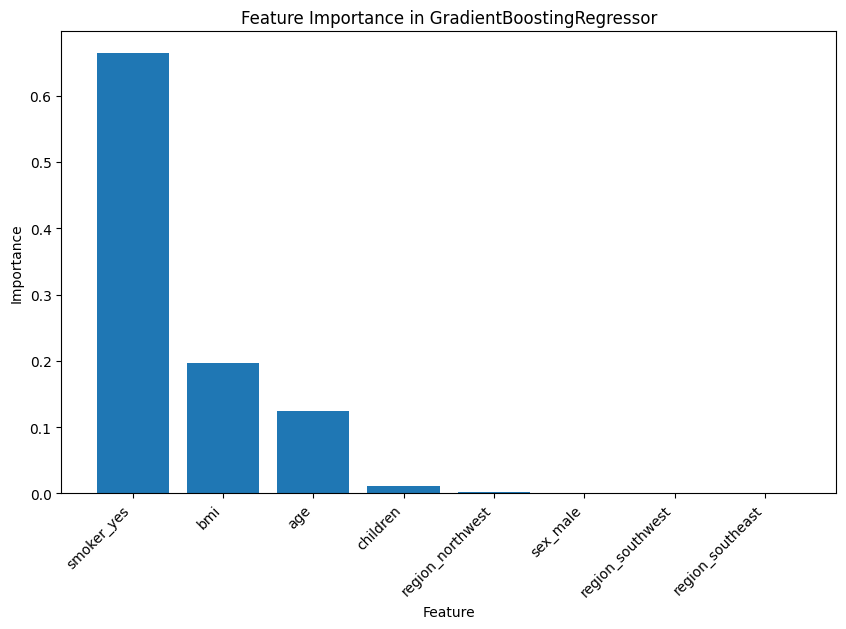

In [40]:
# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_gb['Feature'], feature_importance_gb['Importance'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in GradientBoostingRegressor')
plt.show()

Como esperado após a análise exploratória,  o fato de a pessoa ser fumante ou não influencia muito no modelo. Além disso, índice de massa corporal e idade também tem uma importância considerável. 

**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.